<a href="https://colab.research.google.com/github/tushar-badlani/DL-lab/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np
import pandas as pd
from sklearn import datasets
import sklearn
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [181]:
dataset = datasets.load_iris()
print(dataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [182]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [183]:
X_test, X_train, y_test, y_train = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=5)

In [184]:
X_tensor = torch.from_numpy(X_train).float()
Y_tensor = torch.from_numpy(y_train).long()
x_tensor = torch.from_numpy(X_test).float()
y_tensor = torch.from_numpy(y_test).long()




In [185]:
class Model(nn.Module):
    def __init__(self, input, output):
      super(Model, self).__init__()
      self.layer1 = nn.Linear(input,5)
      self.layer2 = nn.Linear(5,7)
      self.layer3 = nn.Linear(7,3)
      self.layer4 = nn.Linear(3,output)
      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
      x = self.layer1(x)
      x = self.relu(x)
      x = self.layer2(x)
      x = self.relu(x)
      x = self.layer3(x)
      x = self.relu(x)
      x = self.layer4(x)
      x = self.softmax(x)
      return x


In [186]:
model = Model(4,3)

In [187]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [188]:
loses =[]
test = []

In [189]:
epochs = 1000
for epoch in range(epochs):
  model.train()
  y_pred = model(X_tensor)
  loss = criterion(y_pred, Y_tensor)
  # test_loss = criterion(model(x_tensor), y_tensor)
  # test.append(test_loss.item())
  loses.append(loss.item())
  if epoch % 50 == 0:
    print('epoch: ', epoch, 'loss: ', loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    y_pred = model(x_tensor)
    test_loss = criterion(y_pred, y_tensor)
    test.append(test_loss.item())
    if epoch % 50 == 0:
      print('epoch: ', epoch, 'test_loss: ', test_loss.item())



epoch:  0 loss:  1.0932822227478027
epoch:  0 test_loss:  1.1003307104110718
epoch:  50 loss:  0.917937695980072
epoch:  50 test_loss:  0.9279381036758423
epoch:  100 loss:  0.6733993887901306
epoch:  100 test_loss:  0.6750844717025757
epoch:  150 loss:  0.6178252696990967
epoch:  150 test_loss:  0.6174541711807251
epoch:  200 loss:  0.6021281480789185
epoch:  200 test_loss:  0.6038421988487244
epoch:  250 loss:  0.5927861332893372
epoch:  250 test_loss:  0.5934981107711792
epoch:  300 loss:  0.5853356719017029
epoch:  300 test_loss:  0.5874468088150024
epoch:  350 loss:  0.5790292620658875
epoch:  350 test_loss:  0.5827770233154297
epoch:  400 loss:  0.5729581117630005
epoch:  400 test_loss:  0.5824653506278992
epoch:  450 loss:  0.5684117078781128
epoch:  450 test_loss:  0.5824031233787537
epoch:  500 loss:  0.5642015337944031
epoch:  500 test_loss:  0.5812830328941345
epoch:  550 loss:  0.5617001056671143
epoch:  550 test_loss:  0.5799993276596069
epoch:  600 loss:  0.55945771932601

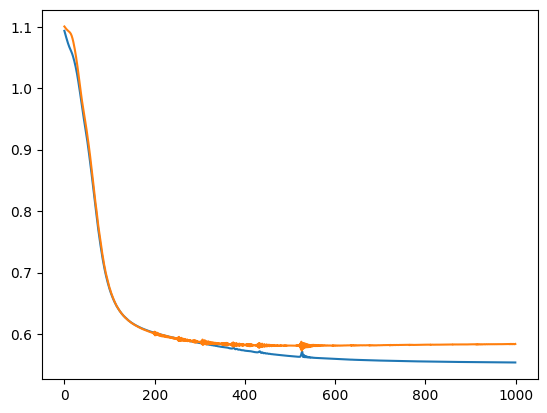

In [190]:
xs = [x for x in range(len(loses))]
plt.plot(xs, loses)
plt.plot(xs, test)
plt.show()

In [191]:
y_pred = model(x_tensor)
_, predicted = torch.max(y_pred, 1)
print(predicted)

tensor([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0,
        0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,
        0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1,
        0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0,
        2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1])


In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_tensor, predicted))
print(precision_score(y_tensor, predicted, average='macro'))
print(recall_score(y_tensor, predicted, average='macro'))
print(f1_score(y_tensor, predicted, average='macro'))

0.9666666666666667
0.9663821150969253
0.9658119658119658
0.9659974012915189
